### Predicting Kicker Points

In [89]:
#import libraries
import nfl_data_py as nfl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [90]:
seasons = range(2023,2024)
pbp_df = nfl.import_pbp_data(seasons)

2023 done.
Downcasting floats.


In [91]:
pbp_df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

In [92]:
kick_cols = ['game_id','home_team','away_team','yardline_100','game_seconds_remaining','ydstogo','play_type','kick_distance','extra_point_result','two_point_conv_result','extra_point_prob','two_point_conversion_prob','two_point_attempt','extra_point_attempt','field_goal_attempt','field_goal_result','kicker_player_name','roof', 'surface', 'temp', 'wind']
        

In [93]:
pbp_kicker = pbp_df[kick_cols]
pbp_kicker = pbp_kicker.query("play_type == 'extra_point' | play_type == 'field_goal' ").reset_index()

In [94]:
pd.set_option('display.max_columns', None)
pbp_kicker.head(20)

,index,game_id,home_team,away_team,yardline_100,game_seconds_remaining,ydstogo,play_type,kick_distance,extra_point_result,two_point_conv_result,extra_point_prob,two_point_conversion_prob,two_point_attempt,extra_point_attempt,field_goal_attempt,field_goal_result,kicker_player_name,roof,surface,temp,wind
0,26,2023_01_ARI_WAS,WAS,ARI,15.0,2955.0,0.0,extra_point,33.0,good,None,0.932427,0.0,0.0,1.0,0.0,None,J.Slye,outdoors,,NaN,NaN
1,36,2023_01_ARI_WAS,WAS,ARI,11.0,2756.0,9.0,field_goal,28.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,M.Prater,outdoors,,NaN,NaN
2,46,2023_01_ARI_WAS,WAS,ARI,36.0,2611.0,9.0,field_goal,54.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,M.Prater,outdoors,,NaN,NaN
3,80,2023_01_ARI_WAS,WAS,ARI,15.0,1855.0,0.0,extra_point,33.0,good,None,0.932427,0.0,0.0,1.0,0.0,None,M.Prater,outdoors,,NaN,NaN
4,89,2023_01_ARI_WAS,WAS,ARI,12.0,1803.0,10.0,field_goal,30.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,J.Slye,outdoors,,NaN,NaN
5,102,2023_01_ARI_WAS,WAS,ARI,19.0,1512.0,11.0,field_goal,37.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,M.Prater,outdoors,,NaN,NaN
6,135,2023_01_ARI_WAS,WAS,ARI,15.0,708.0,0.0,extra_point,33.0,good,None,0.932427,0.0,0.0,1.0,0.0,None,J.Slye,outdoors,,NaN,NaN
7,156,2023_01_ARI_WAS,WAS,ARI,15.0,146.0,3.0,field_goal,33.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,J.Slye,outdoors,,NaN,NaN
8,201,2023_01_BUF_NYJ,NYJ,BUF,22.0,2889.0,2.0,field_goal,40.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,T.Bass,outdoors,,NaN,NaN
9,219,2023_01_BUF_NYJ,NYJ,BUF,8.0,2439.0,5.0,field_goal,26.0,None,None,0.000000,0.0,0.0,0.0,1.0,made,G.Zuerlein,outdoors,,NaN,NaN


In [95]:
#cool graphic of kickers doing the best
#best way to represent 32+ kickers percentages?

In [96]:
### Exploratory Data Analysis
#### Exploring how distance, roof, surface, temp, and wind affect kicker outcomes
#### too many null temp and wind columns stopped tracking information?
#### Can we predict a kickers ability to score a field goal first? using distance and roof type

In [97]:
#build dataframe
pbp_kicker_pred = pbp_kicker[['play_type','extra_point_attempt','field_goal_attempt','extra_point_result','field_goal_result','kick_distance','roof','kicker_player_name']].copy()
#Do this before or after train test split?
replacements = {'good':1, None:0,'failed':0,'blocked':0,'made':1,'missed':0}
pbp_kicker_pred.extra_point_result = pbp_kicker_pred.extra_point_result.replace(replacements)
pbp_kicker_pred.field_goal_result = pbp_kicker_pred.field_goal_result.replace(replacements)

In [98]:
fg = pbp_kicker.query("play_type == 'field_goal' ").reset_index()

In [99]:
fg

,level_0,index,game_id,home_team,away_team,yardline_100,game_seconds_remaining,ydstogo,play_type,kick_distance,extra_point_result,two_point_conv_result,extra_point_prob,two_point_conversion_prob,two_point_attempt,extra_point_attempt,field_goal_attempt,field_goal_result,kicker_player_name,roof,surface,temp,wind
0,1,36,2023_01_ARI_WAS,WAS,ARI,11.0,2756.0,9.0,field_goal,28.0,None,None,0.0,0.0,0.0,0.0,1.0,made,M.Prater,outdoors,,NaN,NaN
1,2,46,2023_01_ARI_WAS,WAS,ARI,36.0,2611.0,9.0,field_goal,54.0,None,None,0.0,0.0,0.0,0.0,1.0,made,M.Prater,outdoors,,NaN,NaN
2,4,89,2023_01_ARI_WAS,WAS,ARI,12.0,1803.0,10.0,field_goal,30.0,None,None,0.0,0.0,0.0,0.0,1.0,made,J.Slye,outdoors,,NaN,NaN
3,5,102,2023_01_ARI_WAS,WAS,ARI,19.0,1512.0,11.0,field_goal,37.0,None,None,0.0,0.0,0.0,0.0,1.0,made,M.Prater,outdoors,,NaN,NaN
4,7,156,2023_01_ARI_WAS,WAS,ARI,15.0,146.0,3.0,field_goal,33.0,None,None,0.0,0.0,0.0,0.0,1.0,made,J.Slye,outdoors,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1484,31507,2023_13_SEA_DAL,DAL,SEA,12.0,3253.0,12.0,field_goal,30.0,None,None,0.0,0.0,0.0,0.0,1.0,made,B.Aubrey,closed,,NaN,NaN
730,1487,31532,2023_13_SEA_DAL,DAL,SEA,24.0,2761.0,11.0,field_goal,42.0,None,None,0.0,0.0,0.0,0.0,1.0,missed,J.Myers,closed,,NaN,NaN
731,1490,31579,2023_13_SEA_DAL,DAL,SEA,13.0,1893.0,13.0,field_goal,31.0,None,None,0.0,0.0,0.0,0.0,1.0,made,B.Aubrey,closed,,NaN,NaN
732,1495,31649,2023_13_SEA_DAL,DAL,SEA,19.0,687.0,12.0,field_goal,38.0,None,None,0.0,0.0,0.0,0.0,1.0,made,B.Aubrey,closed,,NaN,NaN


In [100]:
agg_features = {'kick_distance':'mean'}
kicker_avg_fg = fg.groupby(['kicker_player_name']).agg(agg_features).reset_index()
kicker_avg_fg

,kicker_player_name,kick_distance
0,A.Carlson,37.947369
1,A.Seibert,34.000000
2,B.Aubrey,34.769230
3,B.Grupe,40.366665
4,B.Maher,43.043480
5,B.McManus,42.923077
6,C.Boswell,39.500000
7,C.Dicker,39.055557
8,C.McLaughlin,36.952381
9,C.Ryland,41.111111


In [101]:
agg_features = {'extra_point_attempt':'sum','field_goal_attempt':'sum','extra_point_result':'sum','field_goal_result':'sum'}

kicker_graphic =  pbp_kicker_pred.groupby(['kicker_player_name']).agg(agg_features).reset_index()
kicker_graphic = kicker_graphic.merge(kicker_avg_fg,on='kicker_player_name',how='left')

In [102]:

kicker_graphic['field_goal_percent'] = round(kicker_graphic['field_goal_result']/kicker_graphic['field_goal_attempt'] * 100,2)
kicker_graphic['extra_point_percent'] = round(kicker_graphic['extra_point_result']/kicker_graphic['extra_point_attempt'] * 100,2)
kicker_graphic = kicker_graphic.query("extra_point_attempt > 5 & field_goal_attempt > 5 ")
kicker_graphic

,kicker_player_name,extra_point_attempt,field_goal_attempt,extra_point_result,field_goal_result,kick_distance,field_goal_percent,extra_point_percent
0,A.Carlson,23.0,19.0,20,15,37.947369,78.95,86.96
2,B.Aubrey,39.0,26.0,36,26,34.769230,100.00,92.31
3,B.Grupe,19.0,30.0,19,24,40.366665,80.00,100.00
4,B.Maher,13.0,23.0,12,17,43.043480,73.91,92.31
5,B.McManus,23.0,26.0,23,23,42.923077,88.46,100.00
6,C.Boswell,15.0,22.0,15,21,39.500000,95.45,100.00
7,C.Dicker,30.0,18.0,30,17,39.055557,94.44,100.00
8,C.McLaughlin,19.0,21.0,19,19,36.952381,90.48,100.00
9,C.Ryland,14.0,18.0,14,12,41.111111,66.67,100.00
10,C.Santos,22.0,25.0,21,23,39.040001,92.00,95.45


20

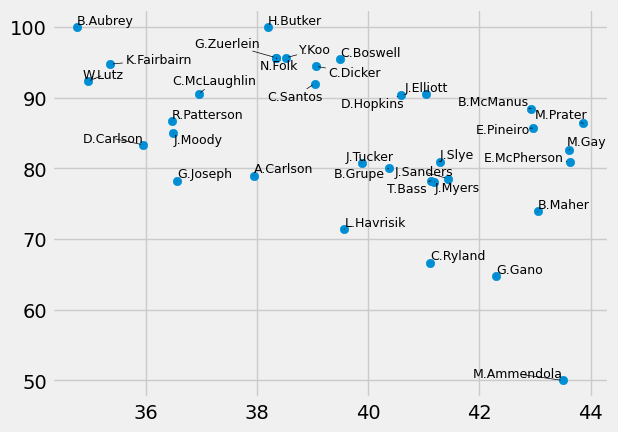

In [104]:
plt.scatter(kicker_graphic['kick_distance'], kicker_graphic['field_goal_percent'])

#for i, name in enumerate(kicker_graphic['kicker_player_name']):
#    plt.text(kicker_graphic['kick_distance'][i], kicker_graphic['field_goal_percent'][i], name, fontsize=9, ha='right')
    
from adjustText import adjust_text

texts = [plt.text(x, y, name, fontsize=9, ha='right') for x, y, name in zip(kicker_graphic['kick_distance'], kicker_graphic['field_goal_percent'],kicker_graphic['kicker_player_name'])]

# Adjust text to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), force_text=0.5, expand_points=(1, 1))


In [174]:
pbp_kicker_pred['roof'].isnull().sum()

0

In [201]:
#Encoding roof variable
pbp_kicker_pred['is_outdoors'] = pbp_kicker_pred['roof'].apply(lambda x: 1 if x == 'outdoors' else 0)
pbp_kicker_pred['is_dome'] = pbp_kicker_pred['roof'].apply(lambda x: 1 if x == 'dome' else 0)
pbp_kicker_pred['is_closed'] = pbp_kicker_pred['roof'].apply(lambda x: 1 if x == 'closed' else 0)
pbp_kicker_pred['is_open'] = pbp_kicker_pred['roof'].apply(lambda x: 1 if x == 'open' else 0)

In [202]:
pbp_kicker_pred.roof.value_counts()

roof
outdoors    945
dome        280
closed      177
open         95
Name: count, dtype: int64

In [203]:
pbp_kicker_pred_fg = pbp_kicker_pred.query("play_type == 'field_goal'").reset_index()
pbp_kicker_pred_ex = pbp_kicker_pred.query("play_type == 'extra_point'").reset_index()

In [204]:
pbp_kicker_pred_fg['is_closed'].isnull().sum()

0

In [205]:
#train_test_split
X_fg = pbp_kicker_pred_fg[['kick_distance', 'is_outdoors','is_dome','is_closed','is_open']]
y_fg = pbp_kicker_pred_fg['field_goal_result']

X_ex = pbp_kicker_pred_ex[['kick_distance', 'is_outdoors','is_dome','is_closed','is_open']]
y_ex = pbp_kicker_pred_ex['extra_point_result']

X_train_fg, X_test_fg, y_train_fg, y_test_fg = train_test_split(X_fg, y_fg, test_size=0.25, random_state=42)
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size=0.25, random_state=42)

In [209]:
X_train_fg['is_closed'].isnull().sum()

0

In [196]:
### Standard Scalar
features = ['kick_distance']

data_reshaped_fg = X_train_fg['kick_distance'].values.reshape(-1, 1)
data_reshaped_ex = X_train_ex['kick_distance'].values.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_fg = scaler.fit_transform(data_reshaped_fg)
df_scaled_fg = pd.DataFrame(scaled_data_fg)

scaled_data_ex = scaler.fit_transform(data_reshaped_ex)
df_scaled_ex = pd.DataFrame(scaled_data_ex)



In [200]:
df_scaled_fg.shape

(550, 1)

In [207]:
#X_train  = X_train.drop(['kick_distance', 'roof'], axis=1)
X_train_fg = pd.concat([X_train_fg.reset_index(drop=True),df_scaled_fg],axis=1)
X_train_ex = pd.concat([X_train_ex.reset_index(drop=True),df_scaled_ex],axis=1)

In [210]:
X_train_fg  = X_train_fg.drop(['kick_distance'], axis=1)
X_train_ex  = X_train_ex.drop(['kick_distance'], axis=1)

In [211]:
X_train_fg = X_train_fg.rename(columns={0: 'kick_distance'})
X_train_fg = X_train_fg[['kick_distance'] + [col for col in X_train_fg.columns if col != 'kick_distance']]

data_reshaped = X_test_fg['kick_distance'].values.reshape(-1, 1)
X_test_fg['kick_distance'] = scaler.transform(data_reshaped)


X_train_ex = X_train_ex.rename(columns={0: 'kick_distance'})
X_train_ex = X_train_ex[['kick_distance'] + [col for col in X_train_ex.columns if col != 'kick_distance']]

data_reshaped = X_test_ex['kick_distance'].values.reshape(-1, 1)
X_test_ex['kick_distance'] = scaler.transform(data_reshaped)

In [212]:
X_train_fg.head()

,kick_distance,is_outdoors,is_dome,is_closed,is_open
0,-1.491891,1,0,0,0
1,-0.450597,1,0,0,0
2,0.780024,1,0,0,0
3,-0.829249,1,0,0,0
4,-1.397228,1,0,0,0


In [213]:
X_train_fg.head()
nan_values = X_train_fg[X_train_fg['is_closed'].isnull()]
nan_values

,kick_distance,is_outdoors,is_dome,is_closed,is_open


In [220]:
#Results
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train_fg, y_train_fg)
print('Field Goal Intercept of model',logistic_model.intercept_)
print('Field Goal Coefficient of model :', logistic_model.coef_)

score_train = logistic_model.score(X_train_fg, y_train_fg)
print('Field Goal accuracy_score overall when tested on the training set:', score_train)

score_test = logistic_model.score(X_test_fg, y_test_fg)
print('Field Goal accuracy_score overall when tested on the testing set :', score_test)
print(" ")

#Results
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_ex, y_train_ex)
print('Extra Point Intercept of model',logistic_model.intercept_)
print('Extra Point Coefficient of model :', logistic_model.coef_)

score_train = logistic_model.score(X_train_ex, y_train_ex)
print('Extra Point accuracy_score overall when tested on the training set:', score_train)

score_test = logistic_model.score(X_test_ex, y_test_ex)
print('Extra Point accuracy_score overall when tested on the testing set :', score_test)

Field Goal Intercept of model [2.08168702]
Field Goal Coefficient of model : [[-1.11165273  0.12463273 -0.12817666 -0.10591855  0.10946799]]
Field Goal accuracy_score overall when tested on the training set: 0.8472727272727273
Field Goal accuracy_score overall when tested on the testing set : 0.4945652173913043
 
Extra Point Intercept of model [3.68255671]
Extra Point Coefficient of model : [[-0.21421042 -0.19219279 -0.05956449 -0.39362526  0.64539462]]
Extra Point accuracy_score overall when tested on the training set: 0.9702797202797203
Extra Point accuracy_score overall when tested on the testing set : 0.9581151832460733


In [224]:
#crummy model for fg's should try something else?
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_fg, label=y_train_fg)
dtest = xgb.DMatrix(X_test_fg, label=y_test_fg)
params = {
    'objective': 'binary:logistic',  # for binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred = xgb_model.predict(dtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test_fg, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.61%


In [217]:
#probability columns

#can we figure out what possesions end in fg?
prob_cols = ['game_id','posteam', 'posteam_type','home_team','away_team','yardline_100','game_seconds_remaining','ydstogo','play_type','no_score_prob','opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob','safety_prob', 'td_prob', 'extra_point_prob','two_point_conversion_prob']

pbp_prob = pbp_df[prob_cols]
#pbp_prob = pbp_kicker.query("play_type == 'extra_point' | play_type == 'field_goal' ").reset_index()
pbp_prob

,game_id,posteam,posteam_type,home_team,away_team,yardline_100,game_seconds_remaining,ydstogo,play_type,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob
0,2023_01_ARI_WAS,None,None,WAS,ARI,NaN,3600.0,0.0,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2023_01_ARI_WAS,WAS,home,WAS,ARI,35.0,3600.0,0.0,kickoff,0.004661,0.144037,0.002072,0.226051,0.212601,0.003828,0.406750,0.0,0.0
2,2023_01_ARI_WAS,WAS,home,WAS,ARI,75.0,3600.0,10.0,run,0.004661,0.144037,0.002072,0.226051,0.212601,0.003828,0.406750,0.0,0.0
3,2023_01_ARI_WAS,WAS,home,WAS,ARI,72.0,3570.0,7.0,pass,0.004854,0.152473,0.002145,0.246986,0.202101,0.003557,0.387884,0.0,0.0
4,2023_01_ARI_WAS,WAS,home,WAS,ARI,66.0,3535.0,1.0,run,0.005151,0.142552,0.002266,0.200164,0.213262,0.004274,0.432329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31690,2023_13_SEA_DAL,SEA,away,DAL,SEA,50.0,75.0,2.0,pass,0.561266,0.027103,0.001031,0.024860,0.166098,0.000772,0.218869,0.0,0.0
31691,2023_13_SEA_DAL,SEA,away,DAL,SEA,50.0,71.0,2.0,pass,0.742106,0.046525,0.001358,0.029887,0.070467,0.001338,0.108320,0.0,0.0
31692,2023_13_SEA_DAL,DAL,home,DAL,SEA,50.0,67.0,10.0,qb_kneel,0.538409,0.023048,0.000402,0.021588,0.296964,0.000661,0.118928,0.0,0.0
31693,2023_13_SEA_DAL,DAL,home,DAL,SEA,50.0,37.0,10.0,qb_kneel,0.609206,0.017887,0.000404,0.011667,0.301213,0.000529,0.059095,0.0,0.0


In [218]:
#Understanding the game,

#what percent of the time are teams kicking field goals on 4th down
#possiblities - teams are far behind and have to attempt a td rather than field goals
#             - time on the clock, teams will kick the field goals early but if they fall behind they will not 
#From graphic - better offenses get kickers closer to the goals and kickers have higher completions 
#Given that the NFL calculates FG and TD probability how to use that to calculate kicker points

#potential formulas 

#kicker points = (probabilty play ends in fg)(3 * [probability fg is made] * [fg attempt (1/0)]) + (probabilty ends in td)( 1 * [extra point prob] * [extra point attempt (1/0)]))

#probability play ends in fg or td = yds need to td - offensive expected yards



